In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
path = '/home/oscarli/projects/meta-analysis-classification/runs/metal_tiered_r12_PN_n20s5q15tb1_SGD0.1Drop204050_base_subset_28:Apr:2021:16:13:46_chkpt023vschkpt021/novel_acc_variance_20.txt'

74.10 74.60

In [3]:
file = open(path, 'r')

In [4]:
lines = file.readlines()
print(len(lines))

130


In [5]:
lines = lines[3:]

In [6]:
len(lines)

127

In [7]:
p = re.compile(r'Alg1: Loss\s*(?P<loss1>\d+\.\d+)\s*Acc\s*(?P<accu1>\d+\.\d+)\s*AccStd\s*\d+\.\d+\s*±\s*(?P<std1>\d+\.\d+)\s*Alg2: Loss\s*(?P<loss2>\d+\.\d+)\s*Acc\s*(?P<accu2>\d+\.\d+)\s*AccStd\s*\d+\.\d+\s*±\s*(?P<std2>\d+\.\d+)')
p2 = re.compile(r'\d+[.]\d+') #

In [8]:
# another way is use the regular expression r'\d+[.]\d+' and find all such occurences.

In [9]:
alg1_accu = []
alg1_loss = []
alg1_95 = []
alg2_accu = []
alg2_loss = []
alg2_95 = []

In [10]:
for i in range(len(lines)):
    m = p.search(lines[i])
#     print(p2.findall(lines[9 * i + 8]))
    
    alg1_accu.append(float(m.group('accu1')))
    alg1_loss.append(float(m.group('loss1')))
    alg1_95.append(float(m.group('std1')))
    alg2_accu.append(float(m.group('accu2')))
    alg2_loss.append(float(m.group('loss2')))
    alg2_95.append(float(m.group('std2')))

alg2_accu = np.array(alg2_accu)
alg1_accu = np.array(alg1_accu)

In [11]:
len(alg1_accu)

127

In [12]:
np.mean(alg1_accu)

73.98216535433068

In [13]:
np.mean(alg1_95)

0.0862992125984252

In [14]:
np.mean(alg2_accu)

74.52366141732283

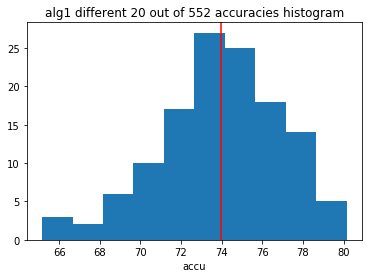

In [15]:
plt.hist(alg1_accu)
plt.xlabel('accu')
plt.title('alg1 different 20 out of 552 accuracies histogram')
plt.axvline(x=np.mean(alg1_accu), color='r')

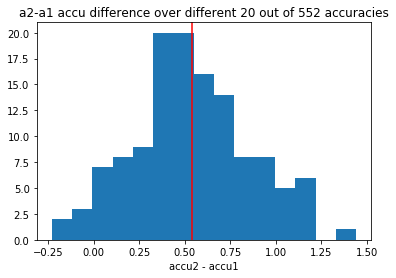

In [16]:
plt.hist(alg2_accu - alg1_accu, bins=15)
plt.xlabel('accu2 - accu1')
plt.title('a2-a1 accu difference over different 20 out of 552 accuracies')
plt.axvline(x=np.mean(alg2_accu - alg1_accu), color='r')

In [17]:
np.sum(alg2_accu < alg1_accu)

7

In [18]:
# note that this only checks for intersection.
# if the lower performing model's CI is actually completely higher than
# the high performing model's CI, it won't be found by this
def intersect(midpoint_1, width_1, midpoint_2, width_2):
    not_intersect = (midpoint_1 + width_1 < midpoint_2 - width_2) or (midpoint_2 + width_2 < midpoint_1 - width_1)
    return not not_intersect

In [19]:
intersect(2, 0.6, 1, 0.5)

True

In [20]:
intersection_indicator = []
for accu1, width_1, accu2, width_2 in zip(alg1_accu, alg1_95, alg2_accu, alg2_95):
    its = intersect(
                midpoint_1=accu1,
                width_1=width_1,
                midpoint_2=accu2,
                width_2=width_2)
    if its:
        print(accu1, width_1, accu2, width_2)
    intersection_indicator.append(its)

70.781 0.09 70.866 0.09
79.275 0.07 79.271 0.07
70.843 0.09 71.008 0.08
73.094 0.09 73.096 0.09
76.079 0.09 76.241 0.09
73.887 0.09 73.996 0.09
73.914 0.09 73.735 0.09
74.747 0.1 74.865 0.09
68.299 0.1 68.193 0.1
76.195 0.09 76.228 0.09
75.116 0.09 75.142 0.09
70.754 0.1 70.952 0.1
71.771 0.09 71.76 0.09
75.439 0.09 75.436 0.09
70.364 0.09 70.317 0.09
80.07 0.08 80.143 0.08


In [21]:
np.sum(intersection_indicator)

16